In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [4]:
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')

In [5]:
color_w = ['w']* len(white)
white['color'] = color_w

color_r = ['r']* len(red)
red['color'] = color_r

In [6]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [7]:
wine = pd.concat([white, red], ignore_index=True, sort=False)

In [8]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,r


In [9]:
Y1 = wine['color']
Y2 = wine['quality']
X = wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.8, random_state=1)

# second model to classify the quality
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.8, random_state=1)


In [10]:
# classify whether wine is red or white

cls1 = SVC().fit(X1_train, Y1_train)
accuracy_train = accuracy_score(Y1_train, cls1.predict(X1_train))
accuracy_test = accuracy_score(Y1_test, cls1.predict(X1_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 93.53%
Test Accuracy: 93.36%


In [11]:
# classify the quality of wine (0-10)

cls2 = SVC().fit(X2_train, Y2_train)
accuracy_train = accuracy_score(Y2_train, cls2.predict(X2_train))
accuracy_test = accuracy_score(Y2_test, cls2.predict(X2_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 43.80%
Test Accuracy: 43.63%


Group 8: 
Wine classification 

1- You have done a baseline with SVM

2- Evaluation: Confusion matrix 

3- If this issue is data imbalance? Maybe separate two model one for white and one for red.
3.5- Deal data imbalance. Upsampling or weighting the loss

4- Apply other classic learning: Decisions trees, random forest => explore your library can quantize the data for you. 

5- Feature analysis: what features are important, Ablation: remove each feature. Depending on your model:  for example check weights. Level of the features in DT, e.g. if it is in the root. 

6- PyTorch: see if it is competitive or not.    

7- Error analysis.

# Step 5 #

This step is giving you another chance to obtain reasonable results if you do not have it yet and try to extend the number of models and techniques that you have used.   
You can use machine learning or deep learning tools (scikitlearn/PyTorch) or use your own implemented algorithm (for example build on your previous programming assignments and extend on those), in any case, you will need to do the following:

1. Make a eval/test/train split of the data

2. Use multiple machine learning models to learn from your training set, let's say at least one model per team member. 

3. Evaluate the models with the test set.

4. Print a report summary about the models' performance on both train, eval and test datasets. You can add all these in your Github that you have shared with us and add a ReadMe file to include the output report os your code.

In [19]:
confusion_matrix1 = metrics.confusion_matrix(Y1_test, cls1.predict(X1_test))
print("Confusion Matrix for predicting red or white wine:")
confusion_matrix1

Confusion Matrix for predicting red or white wine:


array([[1011,  249],
       [  96, 3842]])

In [20]:
confusion_matrix2 = metrics.confusion_matrix(Y2_test, cls2.predict(X2_test))
print("Confusion Matrix for predicting wine quality:")
confusion_matrix2

Confusion Matrix for predicting wine quality:


array([[   0,    0,    0,   20,    0,    0,    0],
       [   0,    0,    0,  170,    0,    0,    0],
       [   0,    0,    0, 1700,    0,    0,    0],
       [   0,    0,    0, 2268,    0,    0,    0],
       [   0,    0,    0,  889,    0,    0,    0],
       [   0,    0,    0,  146,    0,    0,    0],
       [   0,    0,    0,    5,    0,    0,    0]])

Total Red: 1599
quality 1 : 0
quality 2 : 0
quality 3 : 10
quality 4 : 53
quality 5 : 681
quality 6 : 638
quality 7 : 199
quality 8 : 18
quality 9 : 0
quality 10 : 0


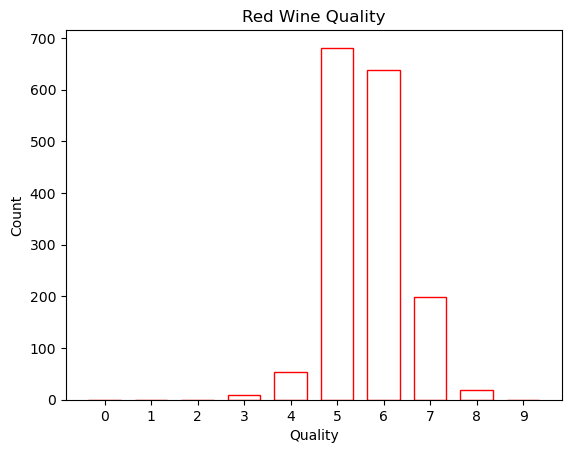

In [21]:
print("Total Red:",len(red))

for i in range(1,11):  
    print("quality",i,":",len(red[red["quality"] == i]))
    
plt.hist(red["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "red")
plt.title("Red Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()

Total White: 4898
quality 1 : 0
quality 2 : 0
quality 3 : 20
quality 4 : 163
quality 5 : 1457
quality 6 : 2198
quality 7 : 880
quality 8 : 175
quality 9 : 5
quality 10 : 0


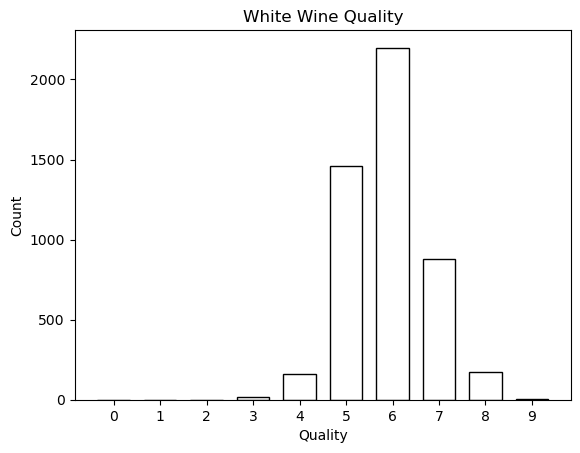

In [22]:
print("Total White:",len(white))

for i in range(1,11):  
    print("quality",i,":",len(white[white["quality"] == i]))
    
plt.hist(white["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "black")
plt.title("White Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()

Total: 6497
quality 1 : 0
quality 2 : 0
quality 3 : 30
quality 4 : 216
quality 5 : 2138
quality 6 : 2836
quality 7 : 1079
quality 8 : 193
quality 9 : 5
quality 10 : 0


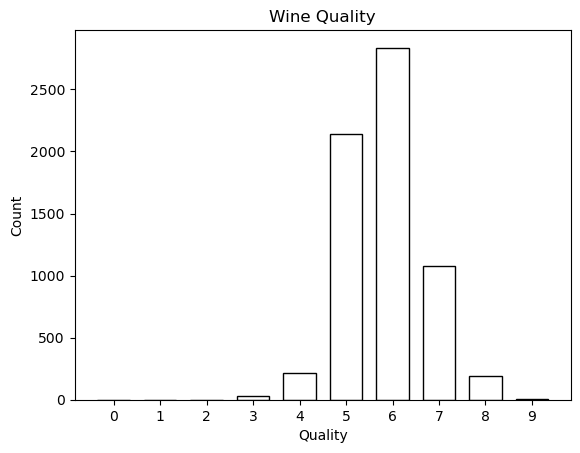

In [16]:
print("Total:",len(wine))

for i in range(1,11):  
    print("quality",i,":",len(wine[wine["quality"] == i]))
    
plt.hist(wine["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "black")
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()